# Online Payments Fraud Detection

In this project I will solve a classification problem on online fraud payments detection using machine learning. For this task, I collected a [dataset](https://www.kaggle.com/datasets/ealaxi/paysim1?resource=download) from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments.

Below are all the columns from the dataset I’m using here:

- *step*: represents a unit of time where 1 step equals 1 hour
- *type*: type of online transaction
- *amount*: the amount of the transaction
- *nameOrig*: customer starting the transaction
- *oldbalanceOrg*: balance before the transaction
- *newbalanceOrig*: balance after the transaction
- *nameDest*: recipient of the transaction
- *oldbalanceDest*: initial balance of recipient before the transaction
- *newbalanceDest*: the new balance of recipient after the transaction
- *isFraud*: fraud transaction

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing necessary libraries and dataset





In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"
pio.templates.default = 'seaborn'

In [97]:
df = pd.read_csv('/content/onlinefraud.csv')

### Dataset Cleaning and Evaluation

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3830450 entries, 0 to 3830449
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 321.5+ MB


In [99]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [100]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3.830450e+06,3.830450e+06,3.830450e+06,3.830450e+06,3.830449e+06,3.830449e+06,3.830449e+06,3.830449e+06
mean,1.529244e+02,1.560389e+05,8.388930e+05,8.603129e+05,9.938765e+05,1.096258e+06,8.356723e-04,7.831980e-07
std,8.708459e+01,3.275166e+05,2.905057e+06,2.941489e+06,2.323983e+06,2.430679e+06,2.889592e-02,8.849845e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.400000e+01,1.230613e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.660000e+02,7.480449e+04,1.455100e+04,0.000000e+00,1.360968e+05,2.195158e+05,0.000000e+00,0.000000e+00
75%,2.270000e+02,2.076740e+05,1.107327e+05,1.492895e+05,9.373585e+05,1.110722e+06,0.000000e+00,0.000000e+00
max,2.820000e+02,9.244552e+07,3.893942e+07,3.894623e+07,1.926246e+08,1.926246e+08,1.000000e+00,1.000000e+00


In [101]:
df.isFraud.value_counts()

0.0    3827248
1.0       3201
Name: isFraud, dtype: int64

In [102]:
df.isFlaggedFraud.value_counts()

0.0    3830446
1.0          3
Name: isFlaggedFraud, dtype: int64

In [103]:
merged_df = pd.merge(df[df['isFraud']==1], df[df['isFlaggedFraud']==1], how='outer', indicator=True)
common_rows = merged_df[merged_df['_merge'] == 'both']

In [104]:
len(common_rows)

3

In [105]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

No null values present in the dataset. No cleaning
of the dataset needed.



### EDA

In [106]:
# Correlation between isFraud feature with other features
# df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)[1:].iplot(kind='bar')
fig1 = px.bar(x=df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)[1:].index, y=df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)[1:].values,
              color=df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)[1:].index, color_discrete_sequence=px.colors.sequential.Viridis_r,
              text=df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)[1:].values, title='Target Feature (isFraud) Correlation Plot')
fig1.update_xaxes(title_text='Features')
fig1.update_yaxes(title_text='Correlation')

The correlation plot shows that isFraud feature is most correlated with the amount of transaction made, though it is only 7.6%. isFraud feature is negatively correlated with oldbalanceDest and newbalanceOrig features.

In [107]:
df.type.value_counts().sort_values()

DEBIT         23547
TRANSFER     316334
CASH_IN      839145
PAYMENT     1290351
CASH_OUT    1361073
Name: type, dtype: int64

In [108]:
# Transaction Type Distribution
fig2 = px.pie(data_frame=df,
              values=df.type.value_counts().sort_values().values,
              names=df.type.value_counts().sort_values().index,
              title='Distribution of Transaction Type', color=df.type.value_counts().sort_values().index,
             color_discrete_sequence=px.colors.sequential.Viridis_r, height=500)
fig2

The above transaction type distribution shows that CASH_OUT, PAYMENT and CASH_IN are top 3 most preferred transaction types with TRANSFER and DEBIT being the least preferred.

### Tailoring dataset

In [109]:
df['type'] = df['type'].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN': 3, 'TRANSFER': 4, 'DEBIT': 5})
df['isFraud'] = df['isFraud'].map({0: 'No Fraud', 1: 'Fraud'})
# df['isFlaggedFraud'] = df['isFlaggedFraud'].map({0: 'No Fraud', 1: 'Fraud'})
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [110]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,No Fraud,0.0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,No Fraud,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,Fraud,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,Fraud,0.0
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,No Fraud,0.0


In [111]:
from sklearn.model_selection import train_test_split

As the dataset is quite large and it may take very long to train model on such a large dataset. So I will use only a small portion of the dataset to continue with this project.

In [120]:
current_ratio = df.isFraud.value_counts(normalize=True)
current_ratio

No Fraud    0.999164
Fraud       0.000836
Name: isFraud, dtype: float64

In [113]:
new_df_size = 80000
nofraud_need, fraud_need = np.ceil(new_df_size*current_ratio).astype(int)

In [114]:
df_nofraud = df[df['isFraud'] == 'No Fraud'].sample(nofraud_need)
df_fraud = df[df['isFraud'] == 'Fraud'].sample(fraud_need)
df_new = pd.concat([df_nofraud, df_fraud], ignore_index=True)
df_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,181,1,161218.39,12926.00,0.00,369868.98,531087.37,No Fraud,0.0
1,163,2,8046.65,51388.00,43341.35,0.00,0.00,No Fraud,0.0
2,260,3,185307.99,1424969.44,1610277.43,2380676.82,2195368.83,No Fraud,0.0
3,253,3,289313.21,10621581.99,10910895.20,348970.75,59657.55,No Fraud,0.0
4,33,1,41522.53,119403.00,77880.47,0.00,41522.53,No Fraud,0.0


In [115]:
X_new = df_new.drop('isFraud', axis=1)
y_new = df_new.isFraud

In [116]:
# X = df.drop('isFraud', axis=1).iloc[:80000]
# y = df.isFraud.iloc[:80000]

In [117]:
y_new.value_counts()

No Fraud    79934
Fraud          67
Name: isFraud, dtype: int64

In [118]:
X_train, X_out, y_train, y_out = train_test_split(X_new, y_new, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_out, y_out, test_size=0.5, random_state=42)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
              'max_features': [2, 3, 8, 'sqrt', 'log2']
              }
from sklearn.metrics import f1_score, make_scorer

# Define a custom scorer
f1_scorer = make_scorer(f1_score, pos_label='Fraud')
# from sklearn.metrics import SCORERS
# print(SCORERS.keys())
dtree_grid = GridSearchCV(estimator=dtree,
                          param_grid=param_grid,
                          n_jobs=-1,
                          cv=5,
                          scoring=f1_scorer,
                          error_score="raise"
                          )

In [ ]:
dtree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [2, 3, 8, 'sqrt', 'log2']},
             scoring=make_scorer(f1_score, pos_label=Fraud))

In [ ]:
dtree_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2')

In [ ]:
dtree_grid.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 3}

In [ ]:
dtree_grid.best_score_

0.592382960035134

In [ ]:
dtree_pred = dtree_grid.predict(X_val)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

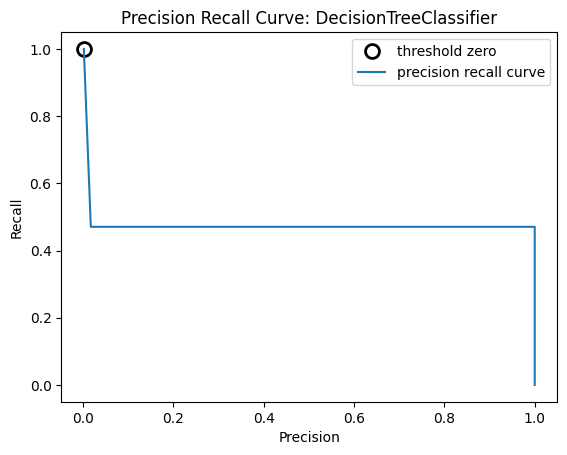

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_val, dtree_grid.best_estimator_.predict_proba(X_val)[:, 0], pos_label='Fraud')
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.title('Precision Recall Curve: DecisionTreeClassifier')
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='best')

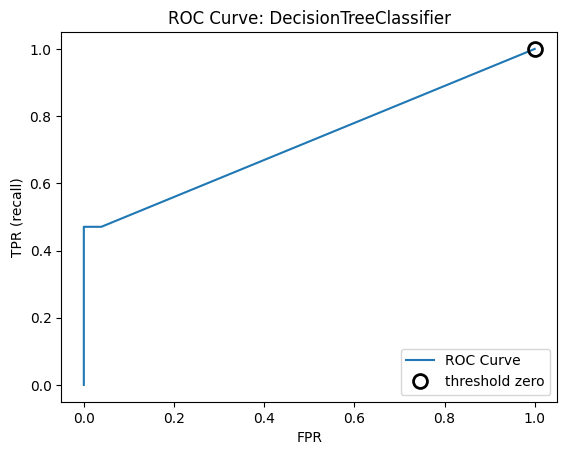

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, dtree_grid.best_estimator_.predict_proba(X_val)[:, 0], pos_label='Fraud')
plt.title('ROC Curve: DecisionTreeClassifier')
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [ ]:
print('AUC of Decision Tree: ', roc_auc_score(y_val, dtree_grid.best_estimator_.predict_proba(X_val)[:, 1]))

AUC of Decision Tree:  0.7250222128407401


Decision Tree Classifier: Confusion Matrix


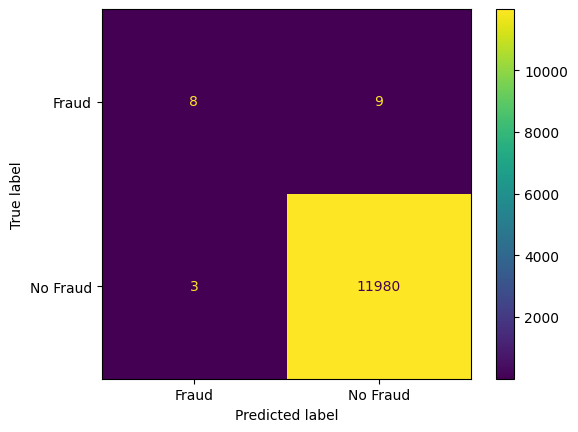

In [ ]:
print('Decision Tree Classifier: Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, dtree_pred), display_labels=dtree_grid.classes_).plot();

In [ ]:
print(f"Classification Report Decision Tree Classifier:\n{classification_report(y_val, dtree_pred)}")

Classification Report Decision Tree Classifier:
              precision    recall  f1-score   support

       Fraud       0.73      0.47      0.57        17
    No Fraud       1.00      1.00      1.00     11983

    accuracy                           1.00     12000
   macro avg       0.86      0.74      0.79     12000
weighted avg       1.00      1.00      1.00     12000



### Final Test Set Evaluation

In [ ]:
test_pred = dtree_grid.predict(X_test)

Decision Tree Classifier: Test Set Confusion Matrix


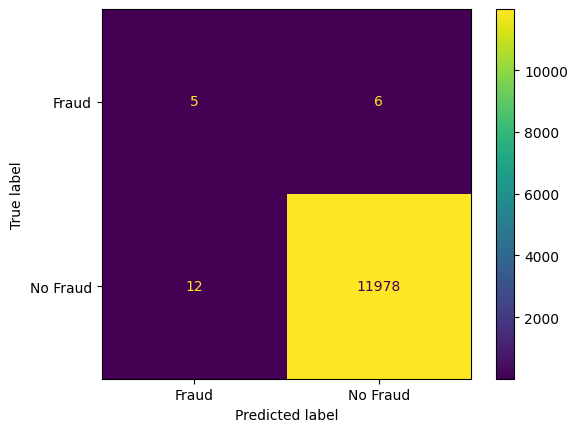

In [ ]:
print('Decision Tree Classifier: Test Set Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_pred), display_labels=dtree_grid.classes_).plot();

In [ ]:
print(f"Classification Report Decision Tree Classifier Test Set:\n{classification_report(y_test, test_pred)}")

Classification Report Decision Tree Classifier Test Set:
              precision    recall  f1-score   support

       Fraud       0.29      0.45      0.36        11
    No Fraud       1.00      1.00      1.00     11990

    accuracy                           1.00     12001
   macro avg       0.65      0.73      0.68     12001
weighted avg       1.00      1.00      1.00     12001



In [ ]:
feature_names = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']
features = np.array([[1, 1, 100000.0, 100000.0, 0.0, 0.0, 0.0, 0]])
features_df = pd.DataFrame(features, columns=feature_names)
print(dtree_grid.predict(features_df))

['No Fraud']


### Conclusion
So the decision tree classifier performs well on the final test set correctly classifying most of the fraud payments. It also correctly classified the features_df.